## OUTLIER REMOVAL USING PERCENTILE

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np


In [36]:
df = pd.read_csv("weight-height.csv")

In [37]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\vxgc2\AppData\Local\Temp\ipykernel_17748\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

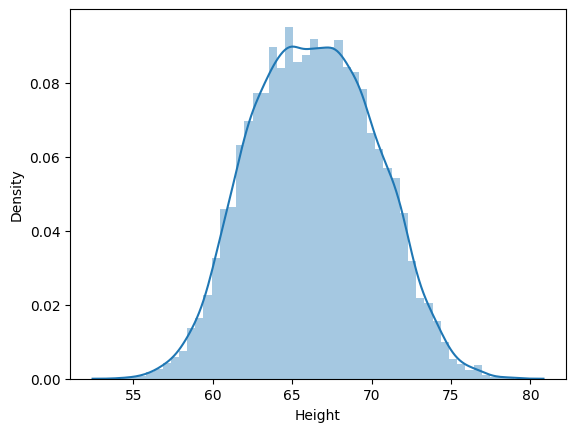

In [38]:
sns.distplot(df["Height"])

<Axes: ylabel='Height'>

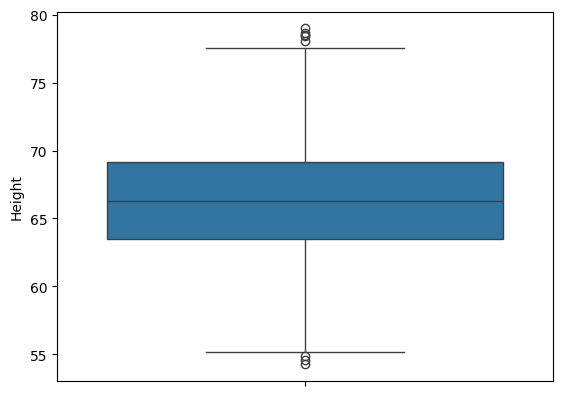

In [39]:
sns.boxplot(df["Height"])

In [40]:
min_limit = df["Height"].quantile(0.01)
max_limit = df["Height"].quantile(0.99)

In [41]:
min_limit

58.13441158671655

In [42]:
max_limit

74.7857900583366

In [43]:
df[(df["Height"]>max_limit)|(df["Height"]<min_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


these are the no. of outliers

In [44]:
df.shape

(10000, 3)

In [45]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## TRIMMING

Just trimming out all value exceeding the max limit and min limit

In [46]:
df2 = df[(df["Height"]<max_limit) & (df["Height"]>min_limit)]

In [47]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Height'>

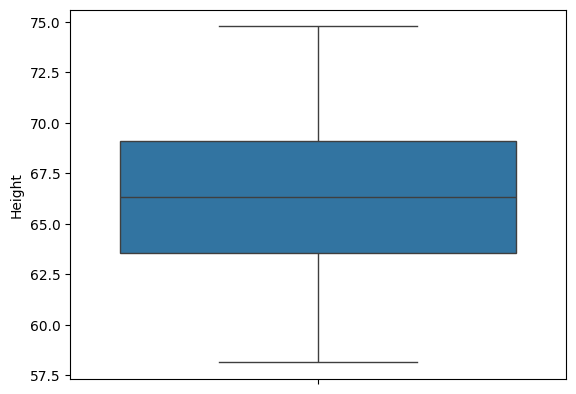

In [48]:
sns.boxplot(df2["Height"])

## CAPPING

just replacing the outliers with max limits or min limits value

In [49]:
df["Height"] = np.where(df["Height"] > max_limit, max_limit, np.where(df["Height"] < min_limit, min_limit, df["Height"]))

In [51]:
df.shape

(10000, 3)

<Axes: ylabel='Height'>

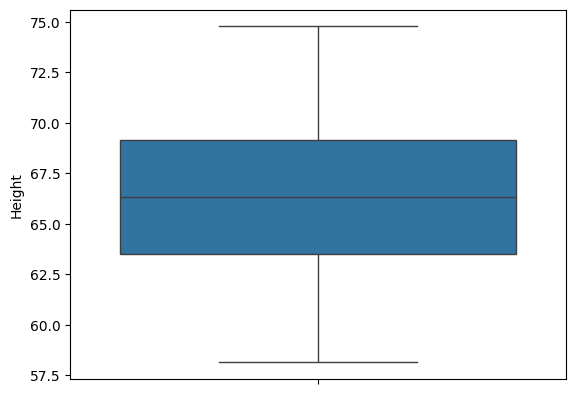

In [52]:
sns.boxplot(df["Height"])